[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20Análisis%20Estadístico%20de%20Datos/notebooks/exercises/5_Practica_MC.ipynb)

----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación.
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso.

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras.

Para ganar, el jugador debe sacar el mismo número en ambos dados.

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades).

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana.

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [1]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [3]:
# Función para lanzar dos dados y verificar si son iguales
def roll_dice():
    #tirada de un dado
    dado1= random.randint(1,6)
    #tirada del otro dado
    dado2= random.randint(1,6)
    same_num = dado1 == dado2
    return same_num

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener.

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**.

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar.

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

In [15]:
# Entradas
num_simulations = 10000
max_num_rolls = 1000 #cuantas tiradas
bet = 1 #cuanto se apuesta

# Seguimiento/para almacenar
win_probability = []
end_balance = []

### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados. Tu ejercicio aquí es replicar la imagen (sin información dentro), con el nombre del título, ejes y ticks.

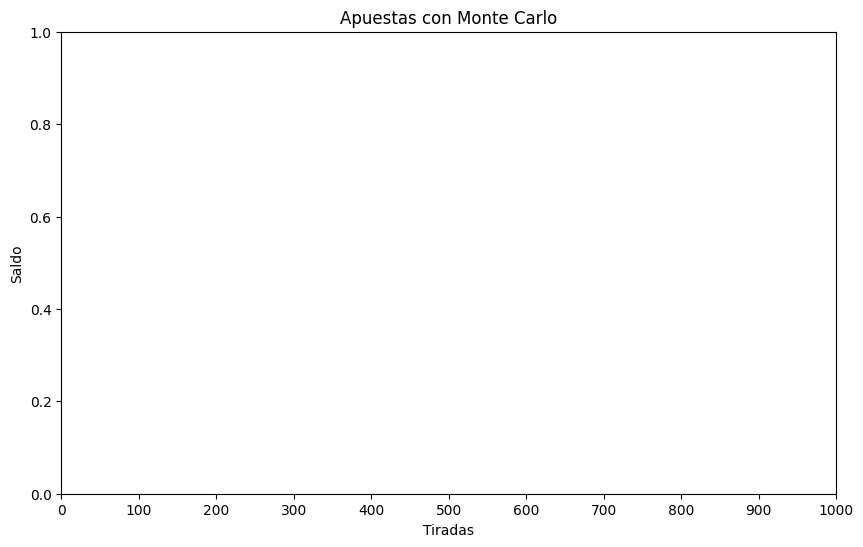

In [6]:
# Configuración de la figura
fig = plt.figure(figsize=(10,6))
plt.title('Apuestas con Monte Carlo')
plt.xlabel('Tiradas')
plt.ylabel('Saldo')
plt.xticks(range(0, max_num_rolls +1, 100))
plt.xlim(0, max_num_rolls)
plt.show()

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas).

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos.

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

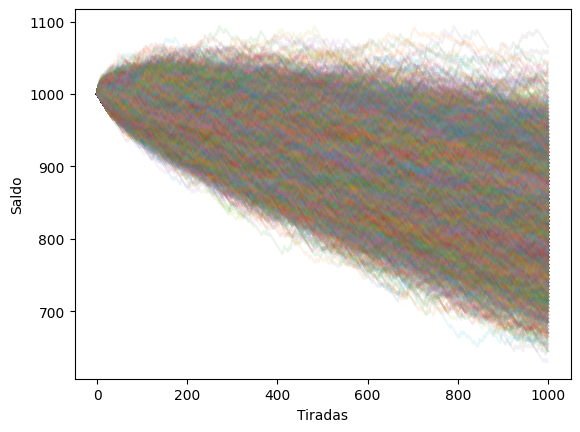

In [42]:

import matplotlib.pyplot as plt
# Simulaciones Monte Carlo
for i in range(num_simulations):
    balance = [1000] #numero de tiradas
    num_rolls = [0]
    num_wins = 0

    while num_rolls[-1] < max_num_rolls:
      #si se lanzan los dos dados, y si sale el mismo
                if roll_dice():
            #toma el ultimo valor que se tiene, y si se gana aplica lo de la casa
                    balance.append(balance[-1] + bet * 4)
            #actualiza el numero de tiradas que se hacen
                    num_rolls.append(num_rolls[-1] + 1)
            #va reasignando las veces que se ganan
                    num_wins += 1
      #caso contrario
                else:
            #cuando no se gana, a lo que llevas se le quita lo que vas apostando
                    balance.append(balance[-1] - bet)
            #actualiza el numero de tiradas
                    num_rolls.append(num_rolls[-1] + 1)
    #guarda los datos de las veces que se gano, en especifico guarda las veces que se gano/ el numero de tiradas = probabilidad de ganar
    win_probability.append(num_wins / max_num_rolls)

    #la apuesta final
    end_balance.append(balance[-1])

    plt.plot(num_rolls,balance, alpha=0.1)
    plt.xlabel('Tiradas')
    plt.ylabel('Saldo')

    #print('saldo final:', end_balance[-1])

In [57]:
# Promedio general
overall_win_probability = sum(win_probability)/num_simulations
overall_end_balance = sum(end_balance)/num_simulations

print("Promedio de victorias después de", num_simulations, "simulaciones, es de : ", round(overall_win_probability,4))
print("Saldo promedio después de",num_simulations, "simulaciones es de :$", round( overall_end_balance, 5))

Promedio de victorias después de 200 simulaciones, es de :  41.6631
Saldo promedio después de 200 simulaciones es de :$ 208313.615


## Desafío Complementario

¡Ahora es tu turno de llevar este experimento un paso más allá!

### Parte 1: Variación en número de lanzamientos y simulaciones

Repite la simulación del juego modificando los siguientes parámetros:

- Número de **lanzamientos por juego**: 10, 100, 1000 y 10,000
- Número de **simulaciones**: 200, 2000 y 20,000

Observa cómo cambian los resultados con estas combinaciones. ¿Qué patrones detectas? ¿Qué tanto varía el saldo promedio y la probabilidad de ganar al modificar estos valores?

---

### Parte 2: Regla alternativa — Apuesta especial

En esta nueva variante del juego:

- El jugador **apuesta múltiplos de 3** (por ejemplo, $3, $6, etc.)
- Si gana, **la casa paga 6 veces** el valor apostado
- El **saldo inicial** es de $800

Implementa esta regla alternativa y compárala con el juego original. ¿Cuánto cambia el resultado al aumentar el riesgo y la recompensa? ¿En qué escenarios se obtiene un porcentaje de victoria más favorable?

---

### Parte 3: Visualización y comparación

Para cada escenario:

- Calcula la **probabilidad de ganar** y el **saldo promedio final**
- Usa:
  - **Gráficas de pastel** para representar el porcentaje de victorias vs derrotas
  - **Gráficas de barras** para comparar los saldos finales entre escenarios

💡 Reflexiona:  
¿Cuál es el impacto de modificar las reglas del juego?  
¿Qué estrategias (si es que hay alguna) parecen ser más sostenibles en el largo plazo?

> ¡Este es tu laboratorio de probabilidad! Usa la simulación como una herramienta para descubrir tendencias y construir tus propias conclusiones.


In [45]:
import matplotlib.pyplot as plt
import random

# Función para lanzar dos dados y ver si son iguales, como el ejercicio anterior
def roll_dice():
    return random.randint(1, 6) == random.randint(1, 6)


In [76]:
# Simulación general de un escenario
def simulador_general(num_simulations, max_num_rolls, bet, pago, inicio_apuesta):
    #inicializamos las variables
    win_probability = []
    end_balance = []
    total_ganar = 0
    total_perder = 0
    #para el numero total de simulaciones
    for _ in range(num_simulations):
        balance = inicio_apuesta
        wins = 0

        #para el numero de tiradas
        for _ in range(max_num_rolls):
            #si son iguales
            if roll_dice():
                #la apuesta se multiplica por lo que de la casa
                balance += bet * pago
                #se va actualizando los ganadores
                wins += 1
            #caso contrario
            else:
              #si no son iguales, a lo que apuestas se le va quitando
                balance -= bet
        #las veces que se pierden son el numero de tiradas - las veces que se ganan
        perder = max_num_rolls - wins
        #las veces que se gano
        total_ganar += wins
        #el numero total de veces que se perdio
        total_perder += perder

        #la probabilidad de ganar: las veces que se gano/numero de tiradas
        win_probability.append(wins / max_num_rolls)
        #el dinero final que obtuviste
        end_balance.append(balance)

    #se toman los promedios de todas las simulaciones de
    #las veces que se gano
    general_win_prob = sum(win_probability) / num_simulations
    #el dinero que quedo
    general_balance = sum(end_balance) / num_simulations
    return general_win_prob, general_balance, total_ganar, total_perder


In [80]:
# Parámetros del experimento
num_simulations = 200
max_num_rolls = 100

#original y las variables que ya teniamos
orig_win_prob, orig_balance, orig_wins, orig_losser = simulador_general(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=1,
    pago=4,
    inicio_apuesta=1000)

#modificado, con las mismas variables y con los datos que se planteaban y que estan en simulador general
mod_win_prob, mod_balance, mod_ganar, mod_perd = simulador_general(
    num_simulations=num_simulations,
    max_num_rolls=max_num_rolls,
    bet=3,
    pago=6,
    inicio_apuesta=800
)

In [79]:
#Resultados
print("ESCENARIOS")
print(" Original")
print(f"Probabilidad promedio de ganar: {round(orig_win_prob, 4)}")
print(f"Saldo promedio final: ${round(orig_balance, 2)}")

# print("\n Modificado")
print(f"Probabilidad promedio de ganar: {round(mod_win_prob, 4)}")
print(f"Saldo promedio final: ${round(mod_balance, 2)}")


ESCENARIOS
 Original
Probabilidad promedio de ganar: 0.1675
Saldo promedio final: $983.75
Probabilidad promedio de ganar: 0.1682
Saldo promedio final: $853.33


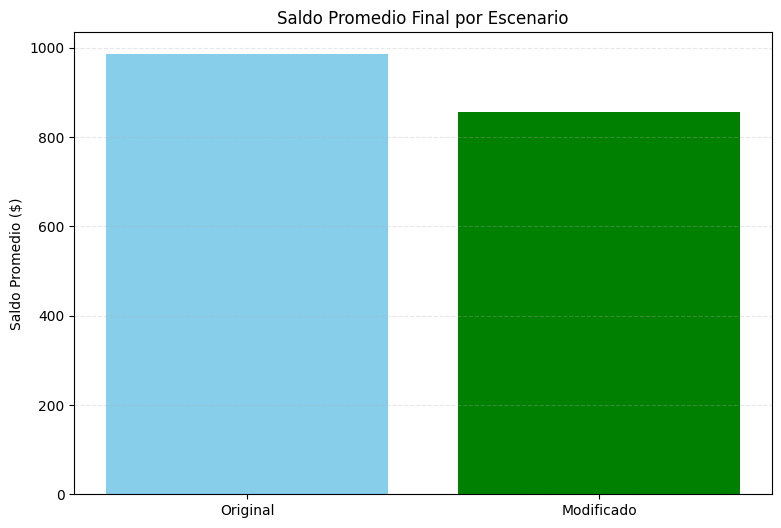

In [81]:
# Gráfica de barras: saldo promedio por cada caso
labels = ['Original', 'Modificado']
balances = [orig_balance, mod_balance]

plt.figure(figsize=(9, 6))
plt.bar(labels, balances, color=['skyblue', 'green'])
plt.title("Saldo Promedio Final por Escenario")
plt.ylabel("Saldo Promedio ($)")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
#<COMPLETA>